---
# **Entrega 04 - Laboratório de Automação e Inovação 1**
 **ALUNO:** Samuel França da Costa Pedrosa

 **MATRÍCULA:** 201900261

---


# **Machine Learning - Clssificação com Caso Jogar Tênis**

---
# **Pre-Processamento**
---

*  Criando o Data Frame conforme a [Tabela da Imagem](https://github.com/scadriano/machinelearning/blob/main/datasets/Jogar_Tenis.png):

In [27]:
import pandas as pd

jogartenis = pd.DataFrame([["Ensolarado", "Quente",    "Alta",   "Fraco", "Não"], # 0
                          ["Ensolarado", "Quente",    "Alta",   "Forte", "Não"], # 1
                          ["Nublado",    "Quente",    "Alta",   "Fraco", "Sim"], # 2
                          ["Chuvoso",    "Moderada",  "Alta",   "Fraco", "Sim"], # 3
                          ["Chuvoso",    "Agradável", "Normal", "Fraco", "Sim"], # 4
                          ["Chuvoso",    "Agradável", "Normal", "Forte", "Não"], # 5
                          ["Nublado",    "Agradável", "Normal", "Forte", "Sim"], # 6
                          ["Ensolarado", "Moderada",  "Alta",   "Fraco", "Não"], # 7
                          ["Ensolarado", "Agradável", "Normal", "Fraco", "Sim"], # 8
                          ["Chuvoso",    "Moderada",  "Normal", "Fraco", "Sim"], # 9
                          ["Ensolarado", "Moderada",  "Normal", "Forte", "Sim"], # 10
                          ["Nublado",    "Moderada",  "Alta",   "Fraco", "Sim"], # 11
                          ["Nublado",    "Quente",    "Normal", "Fraco", "Sim"], # 12
                          ["Chuvoso",    "Moderada",  "Alta",   "Forte", "Não"]]) # 13
jogartenis.columns = ["Tempo", "Temperatura", "Umidade", "Vento", "Jogar Tênis"]

display(jogartenis)

,Tempo,Temperatura,Umidade,Vento,Jogar Tênis
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Moderada,Alta,Fraco,Sim
4,Chuvoso,Agradável,Normal,Fraco,Sim
5,Chuvoso,Agradável,Normal,Forte,Não
6,Nublado,Agradável,Normal,Forte,Sim
7,Ensolarado,Moderada,Alta,Fraco,Não
8,Ensolarado,Agradável,Normal,Fraco,Sim
9,Chuvoso,Moderada,Normal,Fraco,Sim


*  Definindo os parâmetros X e y:

In [28]:
# Definindo o X e y
shape = jogartenis.shape
X = jogartenis.iloc[:, 0:(shape[1]-1)].values # Todas as colunas menos a última
y = jogartenis.iloc[:, (shape[1]-1)].values # Somente a última coluna


In [29]:
from sklearn.preprocessing import LabelEncoder

labels = []

for col in range(shape[1]-1):
  labels.append(LabelEncoder()) # Um label para cada coluna
  X[:, col] = labels[col].fit_transform(X[:, col])

print(X) # X agora é numérico

[[1 2 0 1]
 [1 2 0 0]
 [2 2 0 1]
 [0 1 0 1]
 [0 0 1 1]
 [0 0 1 0]
 [2 0 1 0]
 [1 1 0 1]
 [1 0 1 1]
 [0 1 1 1]
 [1 1 1 0]
 [2 1 0 1]
 [2 2 1 1]
 [0 1 0 0]]


*  Com X e y definidos e já "labelados", agora podemos salvar o arquivo com pickle:

In [30]:
# Salvando
import pickle

with open('jogartenis.pkl', 'wb') as f:
  pickle.dump([X, y], f)

---
# **Processamento**
---

In [32]:
# Baixando e carregando X e Y
import pickle

with open('/content/jogartenis.pkl', 'rb') as f:
  X, y = pickle.load(f)

*  Criando a Árvore e passando so parâmetros X e y:

In [33]:
# Criando a Árvore
from sklearn.tree import DecisionTreeClassifier

tree_jogartenis = DecisionTreeClassifier()

# Treinamento
tree_jogartenis.fit(X, y)

DecisionTreeClassifier()

In [34]:
# Nível de importância dos atributos
tree_jogartenis.feature_importances_

array([0.31555556, 0.15555556, 0.28      , 0.24888889])

*  Árvore já montada, basta visualiza-la e conferir os resultados:

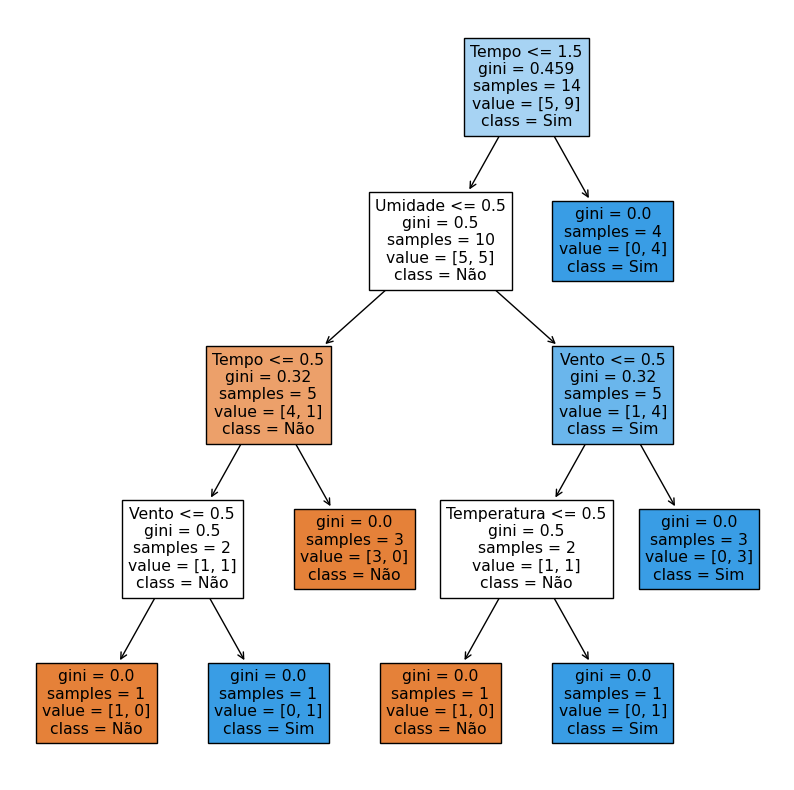

In [35]:
# Visualizando Árvore
import matplotlib.pyplot as plt
from sklearn import tree

previsores = jogartenis.columns[0:(shape[1]-1)]

figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(tree_jogartenis, feature_names=previsores, class_names=tree_jogartenis.classes_, filled=True);
# Tempo: 2 Nublado, 1 Ensolarado, 0 Chuvoso
# Temperatura: 2 Quente, 1 Moderada, 0 Agradável
# Umidade: 1 Normal, 0 Alta
# Vento: 1 Fraco, 0 Forte

# Chuvoso -> Umidade Alta -> Vento Forte -> Não
# Chuvoso -> Umidade Alta -> Vento Fraco -> Sim
# Ensolarado -> Umidade Alta -> Não
# Não Nublado -> Umidade Normal -> Vento Forte -> Temperatura Agradável -> Não
# Não Nublado -> Umidade Normal -> Vento Forte -> Temperatura Não Agradável -> Sim
# Não Nublado -> Umidade Normal -> Vento Fraco -> Sim
# Nublado -> Sim

---
# **Teste do Modelo**
---

*  Teste para verificar funcionalidade da Árvore. Entrada precisa ser uma lista dos dados como string:

In [44]:
testes = [["Ensolarado", "Moderada",  "Normal", "Forte"],
          ["Chuvoso",    "Agradável", "Normal", "Fraco"],
          ["Nublado",    "Quente",    "Normal", "Forte"],
          ["Nublado",    "Agradável", "Alta",   "Forte"]]

for teste in testes:
  teste_numerico = []
  for dado in teste:
    if dado in ("Chuvoso", "Agradável", "Alta", "Forte"):
      teste_numerico.append(0)
    elif dado in ("Ensolarado", "Moderada", "Normal", "Fraco"):
      teste_numerico.append(1)
    elif dado in ("Nublado", "Quente"):
      teste_numerico.append(2)
    else:
      print("Dado informado errado!")
      break
  previsao = tree_jogartenis.predict([teste_numerico])
  print(f'Previsão: {previsao}')


Previsão: ['Sim']
Previsão: ['Sim']
Previsão: ['Sim']
Previsão: ['Sim']
